# Part II - (FordGoBike Dataset)
## by (Victoria Nyaguthii)

## Investigation Overview


> In this investigation,i wanted to see the frequency behaviour of the bike riders and the bike ids.My main focus is the bike id which coverred the most time,most used and the age distribution based on the member genders.

## Dataset Overview

> The forgo Bike dataset presents historical data on a set of people who have rented out bikes,and detailed information such as their station of start and end point,their age,the duration taken and the memebrship type.Some records on 'member_birth_year' and 'member_gender' have been dropped due to missing data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# load in the dataset into a pandas dataframe
fordgobike = pd.read_csv('201902-fordgobike-tripdata.csv')
print(fordgobike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
None


In [3]:
fordgobike.dropna(subset = ['member_birth_year', 'member_gender'], inplace=True)

In [4]:
#Create column for user's age and check for maximum and minimum age incase of outliers
fordgobike['member_age'] = 2022-fordgobike['member_birth_year'].astype('int')
#DROPPING THE MISSING DATA
fordgobike_age_outlier = fordgobike[fordgobike['member_age'] > 80]
#drop the outlier  rows
fordgobike_1= fordgobike.drop(fordgobike_age_outlier.index, axis=0)
print(fordgobike_1.shape)
fordgobike_1

(174935, 17)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,38
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,50
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,33
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,48
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,63
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,39
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,33
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No,34
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No,30
10,458,2019-02-28 23:57:57.2110,2019-03-01 00:05:35.4350,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996.0,Female,Yes,26


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1) -Bikes vs Duration in seconds

>I wanted to investigate the time taken (duration in secs) distribution compared to the number of bike trips made in the dataset

Text(0,0.5,'Number of Bike Hire')

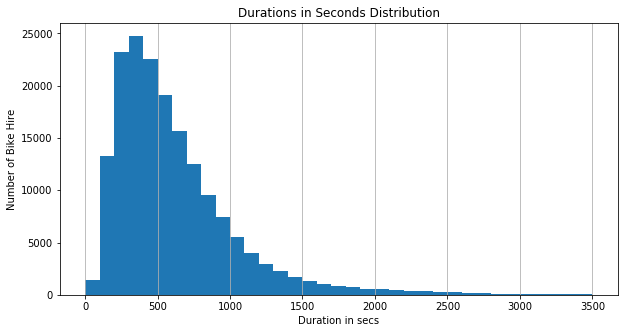

In [24]:
import seaborn as sns
## Depict the distribution of  duration for all trips made
plt.figure(figsize = [10, 5])
bin_edges = np.arange(0, 3600, 100)

plt.hist(data = fordgobike_1, x = 'duration_sec' , bins = bin_edges)
ax = plt.gca()
ax.xaxis.grid()

plt.title('Durations in Seconds Distribution')
plt.xlabel('Duration in secs')
plt.ylabel('Number of Bike Hire')

We can observer that very few trips below 5000 took alot of time that is between 2000 secs and 3500 seconds.Howerver,its noted that most trips took less than 500 seconds. 
The distribution is skewed to the rightwhich means it is positively skewed.The time taken could have been influenced by say traffic at the time or the hire prices of the bikes.

## (Visualization 2) -member age vs Number of Bike Hire

>I wanted to investigate the Age distribution based on the number of bike hires.This would help in giving a clear vision on the age gropu of most of the users in the dataset

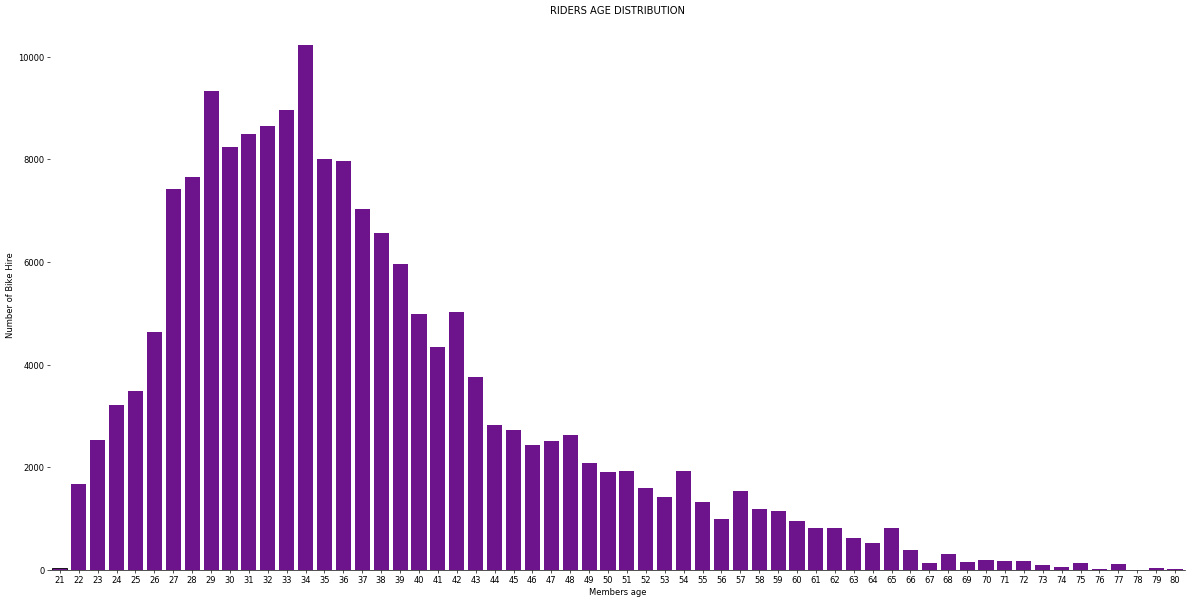

In [26]:
fig, ax = plt.subplots(figsize=(20, 10), dpi = 60)
cpt = sns.color_palette("dark")[3]

sns.countplot(x = "member_age", data = fordgobike_1.sort_values("member_age"), color = cpt, lw = 1, edgecolor = "black");

plt.tight_layout()
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(True)
sns.despine(fig, left = True)

plt.xlabel('Members age');
plt.ylabel('Number of Bike Hire');


plt.title("RIDERS AGE DISTRIBUTION");

>It is interersting that we have some ridrs above the age of 60 activily riding bikes in the dataset.However we can see the data is positively skewed with the most riders being age 34.Most riders lie between the age 28 and 37.
You can tell not many early twentys aged people use the hire bike service.

## (Visualization 3)Member birth year vs Member Gender

> I wanted to find out the distribution of the member gender in regards to to their age 

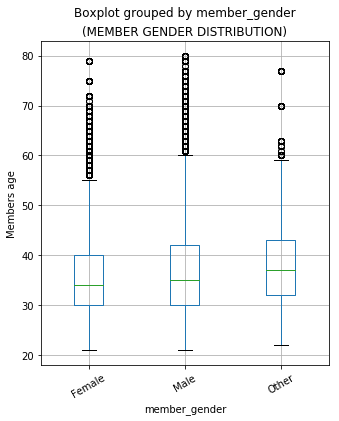

In [39]:
fordgobike_1.boxplot('member_age','member_gender',rot = 30,figsize=(5,6)) 
plt.xlabel('member_gender');
plt.ylabel('Members age');


plt.title("(MEMBER GENDER DISTRIBUTION)");

>It is interesting to see that the females have more outliers comared to theor male compninons in terms of age.
We can note some male users are more aged more than the female users

## (Visualization 3) Top used Bikes
>I wanted to investigate the top most used bikes in the dataset.

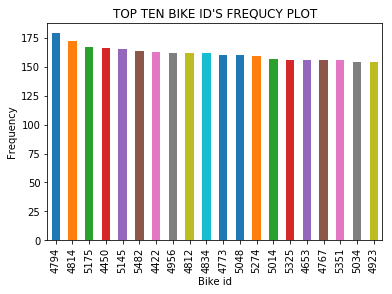

In [40]:
fordgobike_1['bike_id'].value_counts().head(20).plot.bar()
plt.xlabel('Bike id')
plt.ylabel('Frequency')
plt.title("TOP TEN BIKE ID'S FREQUCY PLOT")

plt.show()



>We can note that bike id 4794 has taken the most trips in the dataset,with over 175 trips made.
It is followed closely by bike id 4814 with just a few trips shy of 175 trips

## (Visualization 4) Some numerical Correlation 
>I wanted to do some numerical visualizations .This is to help in understanding correlations of the variables in the dataset.

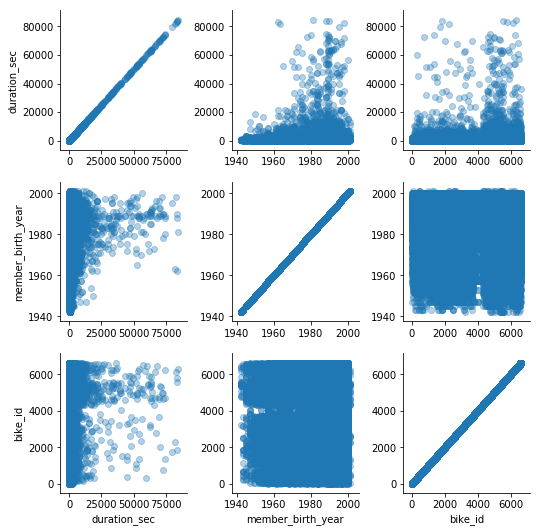

In [41]:
forgo = ["duration_sec", "member_birth_year", "bike_id"]
g = sb.PairGrid(data = fordgobike_1, vars = forgo ) ;
g.map(plt.scatter, alpha = 1/3);

The above charts show how Correlation between `specific numeric variables` in the dataset using scatter plots 
There is no Correlation for the variable duration sec
There is no Correlation between member_birth_year bike_id and duration sec .
There is no significant Correlation for  bike_id with  member_birth_year and duration sec

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt 
#!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 456925 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
